In [1]:
from metrics.wallet.dataframe.builder import Analysis
from metrics.wallet.figure.static_figure import CactusMPL, LINE_STYLES, DEFAULT_COLORS

In [2]:
# An optional function to precise if an experiment is a success or not
def is_success(x):
    success_status = {'complete'}
    success_results = {'SAT-VERIFIED', 'UNSAT'}
    success_verifier = {'--', 'UNSAT-VERIFIED'}

    status = x['status'] in success_status
    results = x['result'] in success_results
    verifier = x['verifier result'] in success_verifier
    
    return status and results and verifier

In [3]:
# Build the Analysis
my_analysis = Analysis(input_file='input/config.yml', is_success=is_success)
campaign_df = my_analysis.campaign_df

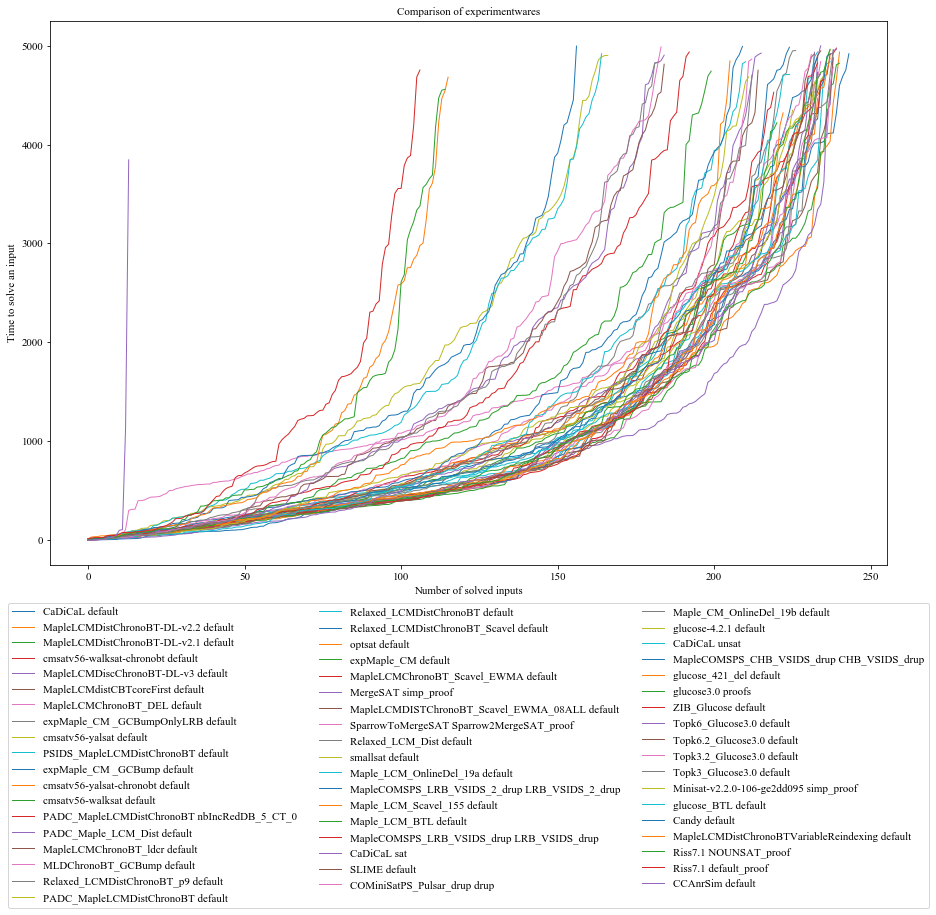

In [4]:
cactus = CactusMPL(
    campaign_df,
    cactus_col='cpu_time', # column permitting to draw lines of the cactus
    cumulated=False,       # cumulate or not the cactus_col value
    show_marker=False,     # show a marker for each experiment
    
    output='output/cactus.svg', # output path or None
    figsize=(15,10),            # size of the figure to output (inch)
    
    color_map=None,        # a map to force the color of each experimentware line
    style_map=None,        # a map to force forces the line style of each experimentware line
    xp_ware_name_map=None, # a map to rename experimentwares
    
    # font properties
    font_name='Times New Roman',
    font_size=11,
    font_color='#000000',
    latex_writing=False, # if True, permits to write in latex mode (make attention to some characters)
    
    logx=False, # log scale to x-axis
    logy=False, # log scale to y-axis
    
    # set the limit of axis, or -1 to take the default value of matplotlib
    x_min=-1, 
    x_max=-1,
    y_min=-1,
    y_max=-1,
    
    # matplotlib location of the legend
    legend_location="upper center",
    bbox_to_anchor=(0.5, -0.06),
    ncol_legend=3,
)
display(cactus.get_figure())

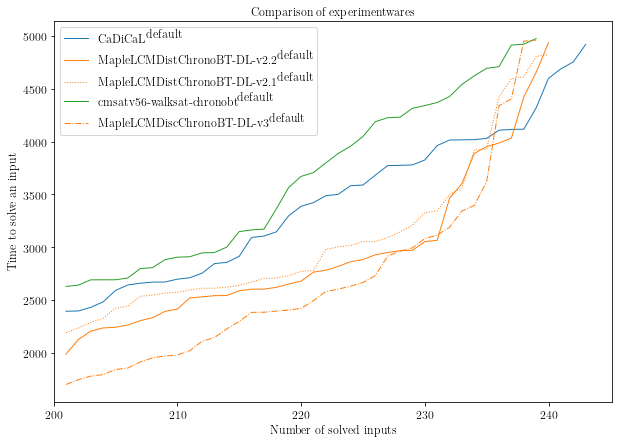

In [5]:
subset = {
    'CaDiCaL default',
    'MapleLCMDistChronoBT-DL-v2.2 default',
    'MapleLCMDistChronoBT-DL-v2.1 default',
    'MapleLCMDiscChronoBT-DL-v3 default',
    'cmsatv56-walksat-chronobt default',
}

xpware_map = {
    'CaDiCaL default': r'$\textrm{CaDiCaL}^\textrm{default}$',
    'MapleLCMDistChronoBT-DL-v2.2 default': r'$\textrm{MapleLCMDistChronoBT-DL-v2.2}^\textrm{default}$',
    'MapleLCMDistChronoBT-DL-v2.1 default': r'$\textrm{MapleLCMDistChronoBT-DL-v2.1}^\textrm{default}$',
    'MapleLCMDiscChronoBT-DL-v3 default': r'$\textrm{MapleLCMDiscChronoBT-DL-v3}^\textrm{default}$',
    'cmsatv56-walksat-chronobt default': r'$\textrm{cmsatv56-walksat-chronobt}^\textrm{default}$',
}

xpware_color = {
    'CaDiCaL default': DEFAULT_COLORS[0],
    'MapleLCMDistChronoBT-DL-v2.2 default': DEFAULT_COLORS[1],
    'MapleLCMDistChronoBT-DL-v2.1 default': DEFAULT_COLORS[1],
    'MapleLCMDiscChronoBT-DL-v3 default': DEFAULT_COLORS[1],
    'cmsatv56-walksat-chronobt default': DEFAULT_COLORS[2],
}

xpware_type = {
    'CaDiCaL default': LINE_STYLES[0],
    'MapleLCMDistChronoBT-DL-v2.2 default': LINE_STYLES[0],
    'MapleLCMDistChronoBT-DL-v2.1 default': LINE_STYLES[1],
    'MapleLCMDiscChronoBT-DL-v3 default': LINE_STYLES[2],
    'cmsatv56-walksat-chronobt default': LINE_STYLES[0],
}

sub_campaign_df = campaign_df.sub_data_frame('experiment_ware', subset)

cactus = CactusMPL(
    sub_campaign_df,
    cactus_col='cpu_time', # column permitting to draw lines of the cactus
    cumulated=False,       # cumulate or not the cactus_col value
    show_marker=False,     # show a marker for each experiment
    
    output='output/cactus_zoom.svg', # output path or None
    figsize=(10,7),                  # size of the figure to output (inch)
    
    color_map=xpware_color,        # a map to force the color of each experimentware line
    style_map=xpware_type,         # a map to force forces the line style of each experimentware line
    xp_ware_name_map=xpware_map,   # a map to rename experimentwares
    
    # font properties
    font_name='Times New Roman',
    font_size=12,
    font_color='#000000',
    latex_writing=True, # if True, permits to write in latex mode (make attention to some characters)
    
    logx=False, # log scale to x-axis
    logy=False, # log scale to y-axis
    
    # set the limit of axis, or -1 to take the default value of matplotlib
    x_min=200,
    x_max=-1,
    y_min=-1,
    y_max=-1,
    
    # matplotlib legend location
    legend_location='best',
    bbox_to_anchor=None,
    ncol_legend=1,
)
display(cactus.get_figure())